In [1]:
import praw
from praw.models import MoreComments

import networkx as nx
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
client_id = '8Ara-tL3whPJTKSzuLe0Wg'
client_secret = '5ciIZ_875ywNSWHWY7S4QcaimF788g'
user_agent = '<console:IC_proiect:1.0>'

In [3]:
reddit = praw.Reddit(client_id = client_id,
                    client_secret = client_secret,
                    user_agent = user_agent)

In [4]:
subreddit = reddit.subreddit("python")

In [9]:
for post in subreddit.hot(limit=5):
    print(post.title)

Sunday Daily Thread: What's everyone working on this week?
Saturday Daily Thread: Resource Request and Sharing! Daily Thread
Pandas Tutor - visualize Python pandas code
Developing a multiplayer co-op zombie survival in pygame and python!
Looking for career advice for a self-taught programmer


### Extracting comments

In [23]:
post_url = "https://www.reddit.com/r/Python/comments/gn9add/drawing_mona_lisa_with_256_circles_using/"
submission = reddit.submission(url = post_url)

Just top level comments

In [28]:
submission.comments.replace_more(limit=None)
for top_level_comment in submission.comments:
    print(top_level_comment.body)

\[Github\] [https://github.com/ahmedkhalf/Circle-Evolution](https://github.com/ahmedkhalf/Circle-Evolution) 

Please note that this is a very early and undocumented version. I plan on adding color, and improving speed, then later putting it on PyPI. Push requests are appreciated :)
This is great.

It gets a really good match, especially if you unfocus your eyes / squint / look out the corner of your eyes. Then your brain doesn’t get distracted by the circles and just sees the shading.

I’d suggest at you include a requirements.txt or a Pipfile so other people can more easily use the code and see what packages you installed.
Love that the solver couldn't figure out Mona Lisa's smile either
Fun project! Congrats!
I didn't read the code, yet I'm wondering: what kind of compression rate do you achieve?
How to learn it? Every time I try to get involved into machine lerning it's so overwhelming. Where to start? Do I have to get deep mathematic understanding?
Cool! My first question is: how d

Multi level comments

In [31]:
submission.comments.replace_more(limit=None)
comment_queue = submission.comments[:]

while comment_queue:
    comment = comment_queue.pop(0)
    print(comment.body)
    print('----------------------')
    comment_queue.extend(comment.replies)

\[Github\] [https://github.com/ahmedkhalf/Circle-Evolution](https://github.com/ahmedkhalf/Circle-Evolution) 

Please note that this is a very early and undocumented version. I plan on adding color, and improving speed, then later putting it on PyPI. Push requests are appreciated :)
----------------------
This is great.

It gets a really good match, especially if you unfocus your eyes / squint / look out the corner of your eyes. Then your brain doesn’t get distracted by the circles and just sees the shading.

I’d suggest at you include a requirements.txt or a Pipfile so other people can more easily use the code and see what packages you installed.
----------------------
Love that the solver couldn't figure out Mona Lisa's smile either
----------------------
Fun project! Congrats!
I didn't read the code, yet I'm wondering: what kind of compression rate do you achieve?
----------------------
How to learn it? Every time I try to get involved into machine lerning it's so overwhelming. Where

### Make a graph from comment tree

In [12]:
submission.comments.replace_more(limit=None)

first_level_comments = submission.comments[:]
comment_queue = list((idx + 2, id) for (idx, id) in enumerate(first_level_comments))

graph_list = []
nodes_num = 0

enums = list(enums for enums, id in comment_queue)
graph_list = list(zip(itertools.repeat(1), enums))
nodes_num += len(graph_list) + 1

while comment_queue:
    idx, comment = comment_queue.pop(0)
    
    # print(idx)
    # print(comment.body)
    # print('----------------------')
    
    l = list((idx + nodes_num + 1, id) for (idx, id) in enumerate(comment.replies))
    nodes_num += len(l)
    
    enums = list(enums for enums, id in l)
    graph_list += list(zip(itertools.repeat(idx), enums))
    
    comment_queue.extend(l)

    
print(nodes_num)
print(graph_list)

214
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1, 46), (1, 47), (1, 48), (1, 49), (1, 50), (1, 51), (1, 52), (1, 53), (1, 54), (1, 55), (1, 56), (1, 57), (1, 58), (1, 59), (1, 60), (1, 61), (1, 62), (1, 63), (1, 64), (1, 65), (1, 66), (1, 67), (1, 68), (1, 69), (1, 70), (1, 71), (1, 72), (1, 73), (1, 74), (1, 75), (1, 76), (1, 77), (1, 78), (1, 79), (1, 80), (1, 81), (1, 82), (1, 83), (1, 84), (1, 85), (1, 86), (1, 87), (1, 88), (1, 89), (1, 90), (1, 91), (1, 92), (1, 93), (1, 94), (1, 95), (1, 96), (1, 97), (1, 98), (1, 99), (1, 100), (1, 101), (1, 102), (1, 103), (1, 104), (1, 105), (1, 106), (1, 107), (1, 108), (1, 109), (1, 110), (1, 111), (

In [4]:
post_url = "https://www.reddit.com/r/Python/comments/hqc7ol/i_made_a_simulation_using_python_in_which_a/"
submission = reddit.submission(url = post_url)

In [5]:
def get_authors_from_comments(comment_list):
    return list(comment.author for comment in comment_list if comment.author != None)
    

def get_edges_from_submission(submission, limit=None):
    submission.comments.replace_more(limit=limit)

    graph_list = []
    comment_queue = submission.comments[:]

    authors = get_authors_from_comments(comment_queue)
    graph_list = list(zip(itertools.repeat(submission.author), authors))

    while comment_queue:
        comment = comment_queue.pop(0)
        if(comment.author != None):
            authors = get_authors_from_comments(comment.replies)
            graph_list += list(zip(itertools.repeat(comment.author), authors))

        comment_queue.extend(comment.replies)
    
    return graph_list

    
graph = get_edges_from_submission(submission)

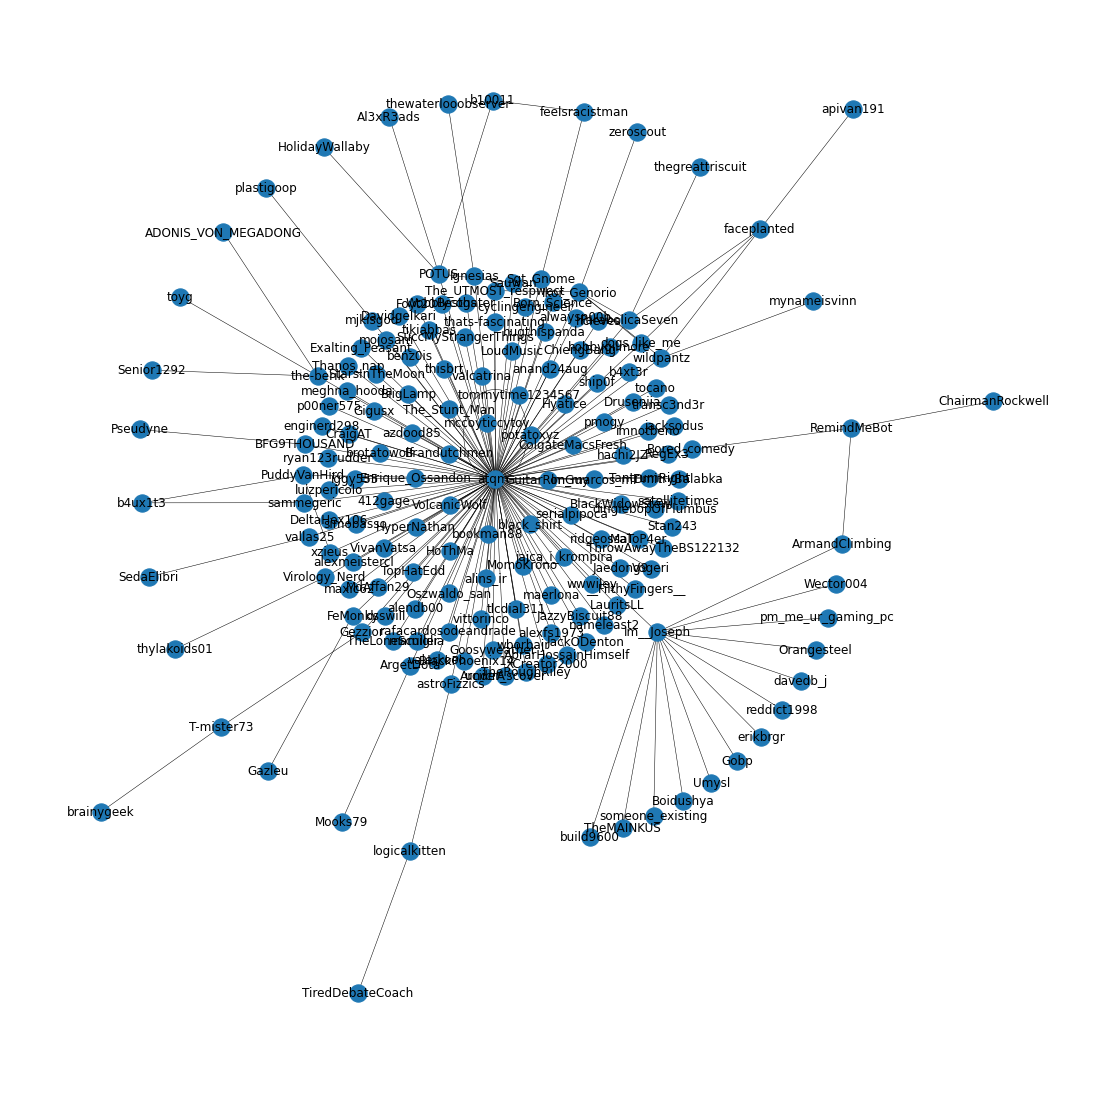

In [6]:
G = nx.Graph(graph)

plt.figure(figsize = (15, 15))
nx.draw_kamada_kawai(G, with_labels=True, width = .5)
